2021-05-08 02:07:59.492 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


0
1
2
3
4
5


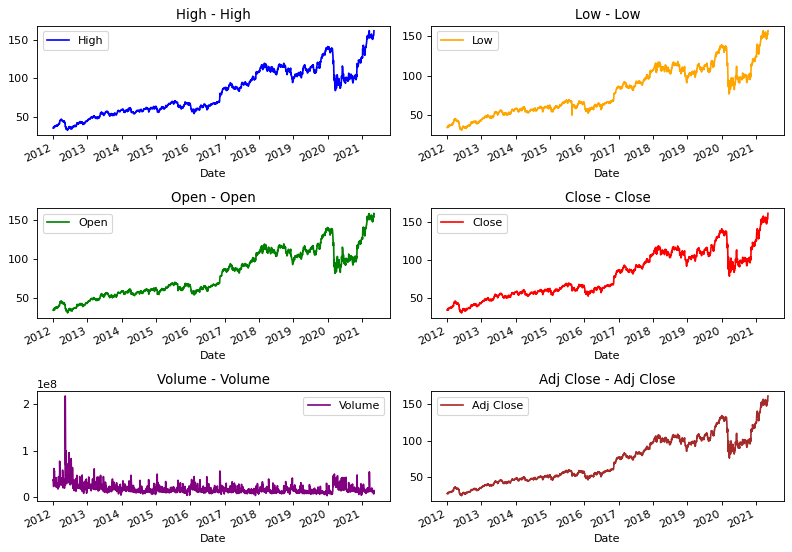

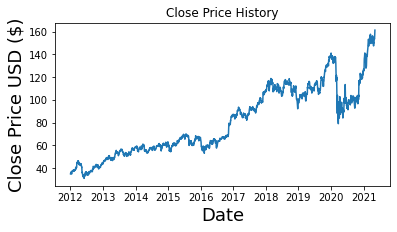

In [1]:
import pandas as pd
import numpy as np 
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import plotly.graph_objects as go
import plotly.express as px
import streamlit as st 
import requests
from pandas_datareader import data
from dateutil.relativedelta import relativedelta
import datetime as dt
from pandas_datareader.data import DataReader
from datetime import datetime
from PIL import Image
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

# symbol=st.sidebar.text_input('Index Symbol',value='AAPL',max_chars=11)
symbol='JPM'    
end=datetime.now()
# end='2020-01-01'
#start = datetime(end.year - 1, end.month, end.day)
start='2012-01-04'
#start = st.sidebar.slider("When do you start?",value=datetime(2000, 1, 1))
#end = st.sidebar.slider("When do you end?",value=datetime(2000, 1, 1))
# st.write(start,end)
dataset = DataReader(symbol, 'yahoo', start, end)
dataset.to_csv(symbol+'.csv')
# st.subheader('Live '+ symbol+ ' Data read from Yahoo Finance')
# st.write(dataset)
feature_keys = [
"High",
"Low",
"Open",
"Close",
"Volume",
"Adj Close",
]
colors = [
"blue",
"orange",
"green",
"red",
"purple",
"brown",

]
titles = [
    "High",
    "Low",
    "Open",
    "Close",
    "Volume",
    "Adj Close",

]

def show_raw_visualization(data):
#     print(data['Date'])
#     time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=3, ncols=2, figsize=(10, 7), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        print(i)
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = dataset.index
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()
show_raw_visualization(dataset)




# pd=dataset.drop(["Volume"],axis=1)
pd=dataset
#chart_data = pd[['Close','Open']]
plt.figure(figsize=(6,3))
plt.title('Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(pd['Close'])
# st.set_option('deprecation.showPyplotGlobalUse', False)
# st.pyplot()
# st.image(f"https://charts2.finviz.com/chart.ashx?t={symbol}")







In [2]:
dataset.index

DatetimeIndex(['2012-01-04', '2012-01-05', '2012-01-06', '2012-01-09',
               '2012-01-10', '2012-01-11', '2012-01-12', '2012-01-13',
               '2012-01-17', '2012-01-18',
               ...
               '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29',
               '2021-04-30', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07'],
              dtype='datetime64[ns]', name='Date', length=2351, freq=None)

In [3]:
# stock=requests.get(f"https://api.stocktwits.com/api/2/streams/symbol/{symbol}.json")
# StockData=stock.json()
# Create a new dataframe with only the 'Close column 
data = dataset.filter(['Close'])
# data = dataset
# data.reset_index(drop=True,inplace=True)
# print(dataset.index)
# Convert the dataframe to a numpy array
NPdataset = data.values
print(NPdataset)
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(NPdataset) * .70 ))
print(training_data_len)
data.head()


[[ 34.95000076]
 [ 35.68000031]
 [ 35.36000061]
 ...
 [157.52000427]
 [160.69000244]
 [161.24000549]]
1646


,Close
Date,
2012-01-04,34.950001
2012-01-05,35.680000
2012-01-06,35.360001
2012-01-09,35.299999
2012-01-10,36.049999


In [4]:
print('MinMaxScaler')
# using minmax sclaer to Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(NPdataset)
int(training_data_len)

MinMaxScaler


1646

In [5]:
# st.write(scaled_data)
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
print(len(train_data))
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print((x_train))
        print(('Mamnishn'))
        print((y_train))
        
    
print('x_train',(x_train))
print('y_train',(y_train))

1646
[array([0.03032863, 0.03593366, 0.03347666, 0.03301596, 0.03877456,
       0.04345823, 0.04491706, 0.0377764 , 0.0300215 , 0.04253686,
       0.04553133, 0.04883293, 0.05113636, 0.05113636, 0.05067566,
       0.04983109, 0.04768119, 0.04614556, 0.04837223, 0.05067566,
       0.05029176, 0.05589679, 0.05482186, 0.05274876, 0.05605036,
       0.05267199, 0.05075246, 0.05605036, 0.05313266, 0.04914006,
       0.05374693, 0.05735566, 0.05727886, 0.05428439, 0.05750922,
       0.05589679, 0.06188576, 0.06303746, 0.06326782, 0.07194409,
       0.07394042, 0.07217446, 0.06388206, 0.06871929, 0.07248156,
       0.07701166, 0.07324939, 0.09513206, 0.09659092, 0.10519042,
       0.10419225, 0.10749385, 0.11041155, 0.10841522, 0.10480652,
       0.10872235, 0.11647725, 0.11432739, 0.11724508, 0.11263819])]
Mamnishn
[0.11501841915249758]
x_train [array([0.03032863, 0.03593366, 0.03347666, 0.03301596, 0.03877456,
       0.04345823, 0.04491706, 0.0377764 , 0.0300215 , 0.04253686,
       0.04553

In [6]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from keras.layers import Dropout

# model = Sequential()
# model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=64, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=32, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=16))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))

model = Sequential()
model.add(LSTM(units = 128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(units = 64, return_sequences=False))
model.add(Dense(units = 25))
model.add(Dense(units = 1))

In [7]:
# Compile the model
print('Compiling model')
model.compile(optimizer='adam', loss='mean_squared_error')
print('Training model')
# Train the model
import os
from keras.models import Sequential, load_model
# Train the model
if(not os.path.exists('LSTM_prediction.h5')):
    model.fit(x_train, y_train, batch_size=32, epochs=30)
    model.save('LSTM_prediction.h5')
model = load_model('LSTM_prediction.h5')


# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset.iloc[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    



Compiling model
Training model


In [8]:
# Convert the data to a numpy array
x_test = np.array(x_test)
print('x_test')
print(len(x_test))
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
print('Predicting price')
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
# rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
# from sklearn import metrics
# r_square = metrics.r2_score(x_test, predictions)
# print('R-Square Error:', r_square)
# print('Mean Absolute Error:', metrics.mean_absolute_error(x_test, predictions))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(x_test, predictions)))
# print('Mean Squared Error:', metrics.mean_squared_error(x_test, predictions))

x_test
705
Predicting price


<ipython-input-9-6cffbf7155a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,Close,Predictions
Date,,
2018-07-20,111.279999,111.211372
2018-07-23,113.349998,111.513229
2018-07-24,114.150002,112.234581
2018-07-25,115.180000,113.130447
2018-07-26,114.849998,114.131111
...,...,...
2021-05-03,153.360001,153.937424
2021-05-04,155.479996,154.269745
2021-05-05,157.520004,154.815262


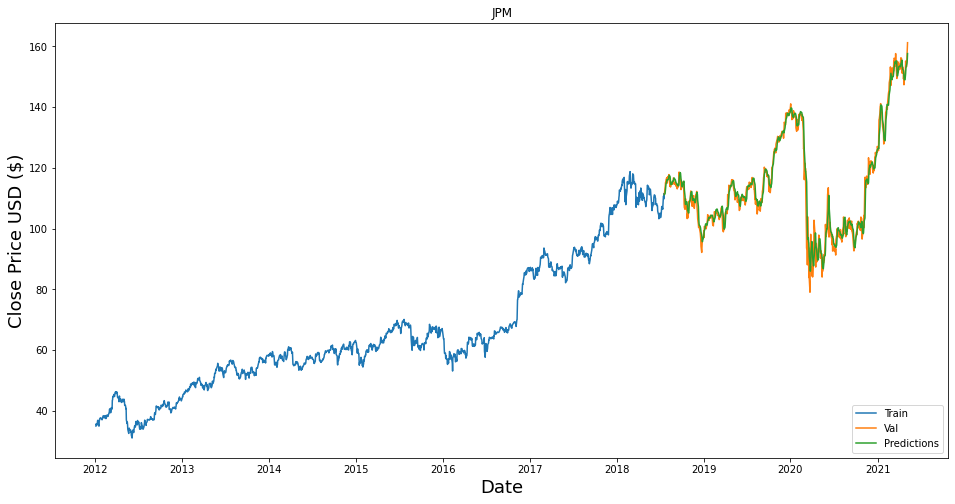

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title(symbol)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
#plt.show()
# st.pyplot()
# Show the valid and predicted prices
# st.write(valid)
valid

R-Square Error: 0.9704198338197967
Mean Absolute Error: 2.0264670946919328
Root Mean Squared Error: 2.973281662606612
Mean Squared Error: 8.84040384519274


<AxesSubplot:xlabel='Date'>

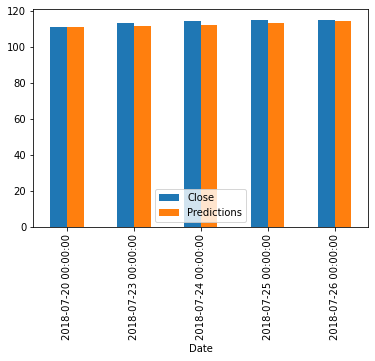

In [10]:
#Get the root mean squared error (RMSE)
#rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
from sklearn import metrics
print('R-Square Error:', metrics.r2_score(valid['Close'] , valid['Predictions']))
print('Mean Absolute Error:', metrics.mean_absolute_error(valid['Close'] , valid['Predictions']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid['Close'] , valid['Predictions'])))
print('Mean Squared Error:', metrics.mean_squared_error(valid['Close'] , valid['Predictions']))

dfr=(valid[['Close','Predictions']])
dfr=dfr.head()
dfr.plot(kind='bar')


In [11]:
y_train.shape

(1586,)

In [12]:
valid

,Close,Predictions
Date,,
2018-07-20,111.279999,111.211372
2018-07-23,113.349998,111.513229
2018-07-24,114.150002,112.234581
2018-07-25,115.180000,113.130447
2018-07-26,114.849998,114.131111
...,...,...
2021-05-03,153.360001,153.937424
2021-05-04,155.479996,154.269745
2021-05-05,157.520004,154.815262


<AxesSubplot:xlabel='Date'>

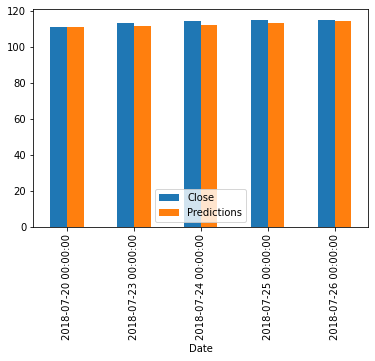

In [13]:
def my_dict(Stock,name,Error,score):
    my_matrix = {}
    my_matrix['Algorithm Name'] = name
    my_matrix['Stock Name'] = Stock
    
    my_matrix['Error Type'] = Error
    my_matrix['Score'] = score
    return my_matrix
    
import pandas as pd
resultsdf = pd.DataFrame()
resultsdf=  resultsdf.append(my_dict(symbol,'LSTM','R-Square Error:',metrics.r2_score(valid['Close'] , valid['Predictions'])),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol,'LSTM','Mean Absolute Error:', metrics.mean_absolute_error(valid['Close'] , valid['Predictions'])),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol,'LSTM','Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid['Close'] , valid['Predictions']))),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol,'LSTM','Mean Squared Error:', metrics.mean_squared_error(valid['Close'] , valid['Predictions'])),ignore_index=True)
# resultsdf=resultsdf.transpose()
resultsdf

dfr=(valid[['Close','Predictions']])
dfr=dfr.head()
dfr.plot(kind='bar')

In [14]:
y_test

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-20,111.739998,109.779999,110.000000,111.279999,13578100.0,102.064758
2018-07-23,114.239998,110.930000,111.059998,113.349998,18140000.0,103.963318
2018-07-24,114.779999,113.419998,113.550003,114.150002,14000400.0,104.697083
2018-07-25,115.519997,113.379997,113.879997,115.180000,13329100.0,105.641792
2018-07-26,115.589996,114.580002,115.419998,114.849998,11897800.0,105.339111
...,...,...,...,...,...,...
2021-05-03,155.479996,153.130005,154.850006,153.360001,11801100.0,153.360001
2021-05-04,155.639999,152.139999,152.869995,155.479996,12977700.0,155.479996
2021-05-05,158.279999,156.000000,156.000000,157.520004,6938200.0,157.520004


In [15]:
from sklearn.model_selection import train_test_split
# X  = dataset[['Open','High','Low','Volume']]
# y = dataset['Close']
# ChartData=dataset.reset_index()

from sklearn.model_selection import train_test_split
X  = dataset[['Open','High','Low','Volume']]
y = dataset['Close']
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0,test_size=.5)
# X_train=X_train.values
# y_train=y_train.values
# X_test=X_test.values
# y_test=y_test.values

# X_train=X_train.reshape(938,2)
# y_train=y_train.reshape(938,2)
# X_test=X_test.reshape(235,2)
# y_test=y_test.reshape(235,2)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
# regressor = LinearRegression()

regressor=XGBRegressor()
regressor.fit(X_train,y_train)
predicted=regressor.predict(X_test)
    
acc = regressor.score(X_test, y_test)
print("Accuracy: " + str(acc))




    


Accuracy: 0.9992570171049653


In [16]:
# plt.rcParams["figure.figsize"] = (20,8)
# plt.scatter(X_train, y_train, color = 'red', label="Actual")
# plt.plot(X_test,y_pred, color='blue', label="Linear Regression")

# plt.title('Apple Stock Prices 2015-Today')
# plt.xlabel('Days')
# plt.ylabel('Close Price')
# plt.legend()
# plt.show()

In [17]:
resultsdf=  resultsdf.append(my_dict(symbol,'XGBRegressor','R-Square Error:',metrics.r2_score(y_test , predicted)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol,'XGBRegressor','Mean Absolute Error:', metrics.mean_absolute_error(y_test , predicted)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol,'XGBRegressor','Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test , predicted))),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol,'XGBRegressor','Mean Squared Error:', metrics.mean_squared_error(y_test , predicted)),ignore_index=True)
# resultsdf=resultsdf.transpose()
resultsdf


,Algorithm Name,Error Type,Score,Stock Name
0,LSTM,R-Square Error:,0.970420,JPM
1,LSTM,Mean Absolute Error:,2.026467,JPM
2,LSTM,Root Mean Squared Error:,2.973282,JPM
3,LSTM,Mean Squared Error:,8.840404,JPM
4,XGBRegressor,R-Square Error:,0.999257,JPM
5,XGBRegressor,Mean Absolute Error:,0.537217,JPM
6,XGBRegressor,Root Mean Squared Error:,0.822472,JPM
7,XGBRegressor,Mean Squared Error:,0.676460,JPM


<AxesSubplot:xlabel='Date'>

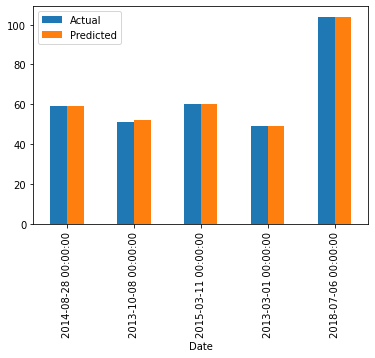

In [18]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})
dfr=dfr.head()
dfr.plot(kind='bar')

In [19]:
# valid = data[training_data_len+41:]
# valid['Predictions'] = predicted
# print(predicted.shape)
# print(valid.shape)
# print(y_test.shape)
# plt.figure(figsize=(16,8))
# plt.title(symbol)
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'])
# # plt.plot(valid[['Close', 'Predictions']])
# plt.plot(y_test , predicted)
# plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

print(y_test )
print(predicted)

Date
2014-08-28     59.160000
2013-10-08     50.869999
2015-03-11     60.240002
2013-03-01     48.910000
2018-07-06    104.059998
                 ...    
2013-06-10     54.360001
2016-06-22     62.709999
2021-01-22    133.789993
2014-02-05     55.209999
2014-12-09     62.450001
Name: Close, Length: 1176, dtype: float64
[ 59.21324   51.919323  60.173477 ... 133.23897   54.855408  62.216686]


In [20]:
from sklearn.ensemble import RandomForestRegressor
randomRegressor=RandomForestRegressor(n_estimators = 100, random_state = 0,min_samples_leaf=1) 
randomRegressor.fit(X_train,y_train)
y_pred = randomRegressor.predict(X_test)

resultsdf=  resultsdf.append(my_dict(symbol,'RandomForestRegressor','R-Square Error:',metrics.r2_score(y_test , y_pred)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol,'RandomForestRegressor','Mean Absolute Error:', metrics.mean_absolute_error(y_test , y_pred)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol,'RandomForestRegressor','Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test , y_pred))),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol,'RandomForestRegressor','Mean Squared Error:', metrics.mean_squared_error(y_test , y_pred)),ignore_index=True)
# resultsdf=resultsdf.transpose()
resultsdf

,Algorithm Name,Error Type,Score,Stock Name
0,LSTM,R-Square Error:,0.970420,JPM
1,LSTM,Mean Absolute Error:,2.026467,JPM
2,LSTM,Root Mean Squared Error:,2.973282,JPM
3,LSTM,Mean Squared Error:,8.840404,JPM
4,XGBRegressor,R-Square Error:,0.999257,JPM
5,XGBRegressor,Mean Absolute Error:,0.537217,JPM
6,XGBRegressor,Root Mean Squared Error:,0.822472,JPM
7,XGBRegressor,Mean Squared Error:,0.676460,JPM
8,RandomForestRegressor,R-Square Error:,0.999525,JPM
9,RandomForestRegressor,Mean Absolute Error:,0.434645,JPM


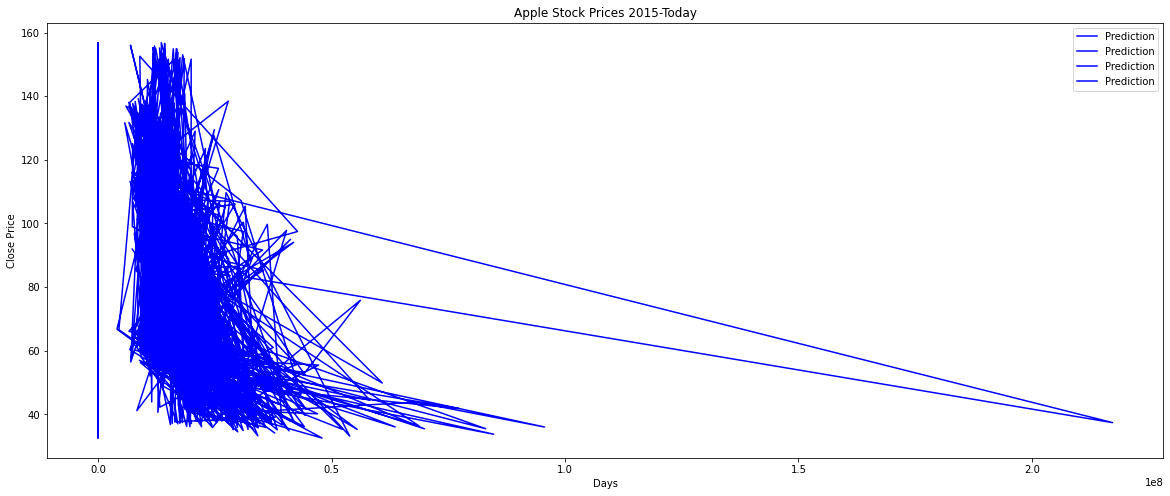

In [21]:
plt.rcParams["figure.figsize"] = (20,8)



#plt.plot(X_train, y_train, color = 'red', label="Actual Train")
#plt.plot(X_test,y_test, color='green', label="Actual Test")
plt.plot(X_test,y_pred, color='blue', label="Prediction")

plt.title('Apple Stock Prices 2015-Today')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

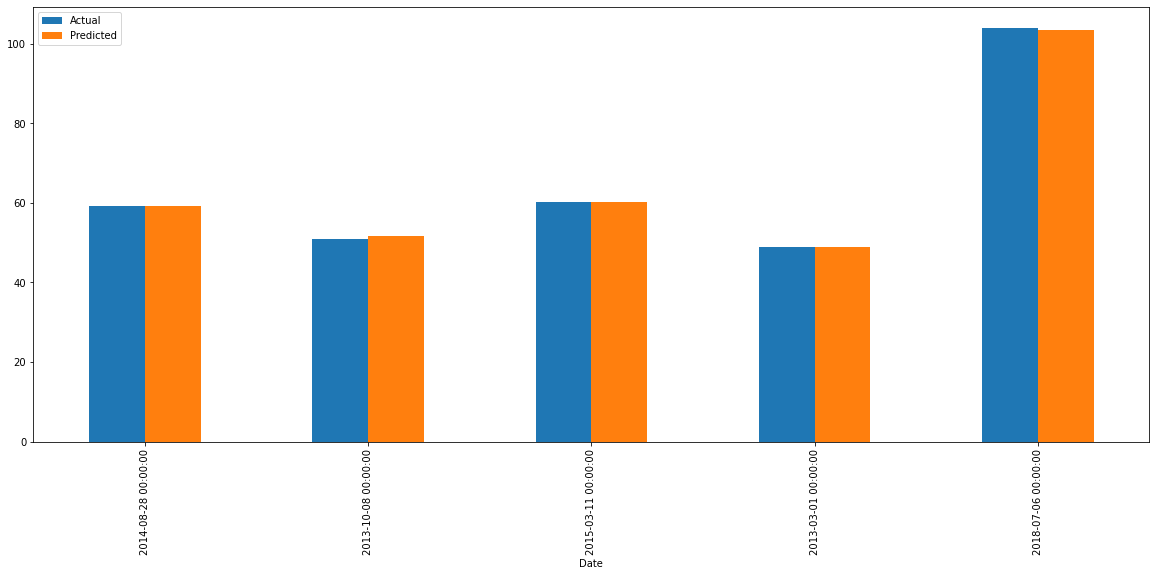

In [22]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dfr=dfr.head()
dfr.plot(kind='bar')

In [23]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
resultsdf=  resultsdf.append(my_dict(symbol+':','DecisionTreeRegressor:','R-Square Error:',metrics.r2_score(y_test , y_pred)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol+':','DecisionTreeRegressor:','Mean Absolute Error:', metrics.mean_absolute_error(y_test , y_pred)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol+':','DecisionTreeRegressor:','Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test , y_pred))),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol+':','DecisionTreeRegressor:','Mean Squared Error:', metrics.mean_squared_error(y_test , y_pred)),ignore_index=True)


In [24]:
resultsdf

,Algorithm Name,Error Type,Score,Stock Name
0,LSTM,R-Square Error:,0.970420,JPM
1,LSTM,Mean Absolute Error:,2.026467,JPM
2,LSTM,Root Mean Squared Error:,2.973282,JPM
3,LSTM,Mean Squared Error:,8.840404,JPM
4,XGBRegressor,R-Square Error:,0.999257,JPM
5,XGBRegressor,Mean Absolute Error:,0.537217,JPM
6,XGBRegressor,Root Mean Squared Error:,0.822472,JPM
7,XGBRegressor,Mean Squared Error:,0.676460,JPM
8,RandomForestRegressor,R-Square Error:,0.999525,JPM
9,RandomForestRegressor,Mean Absolute Error:,0.434645,JPM


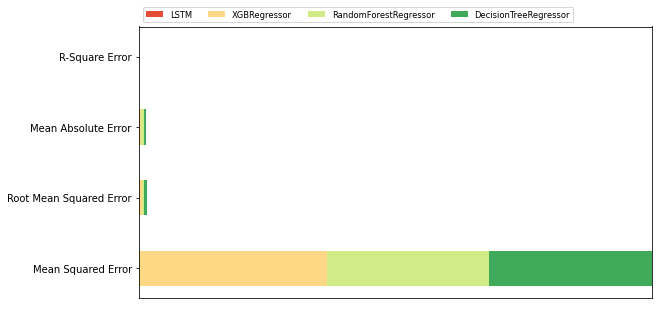

In [25]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['LSTM', 'XGBRegressor',
                  'RandomForestRegressor', 'DecisionTreeRegressor']
results = {
    'R-Square Error':[0.9947, -3.7411, -3.1133, -3.1139],
    'Mean Absolute Error':[1.4991, 60.0534, 54.5852, 54.6984],
    'Root Mean Squared Error': [2.2525, 67.3226, 62.7081, 62.7122],
    'Mean Squared Error': [5.0735, 4532.4716, 3932.3001, 3932.8172]
    }


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        #ax.set(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

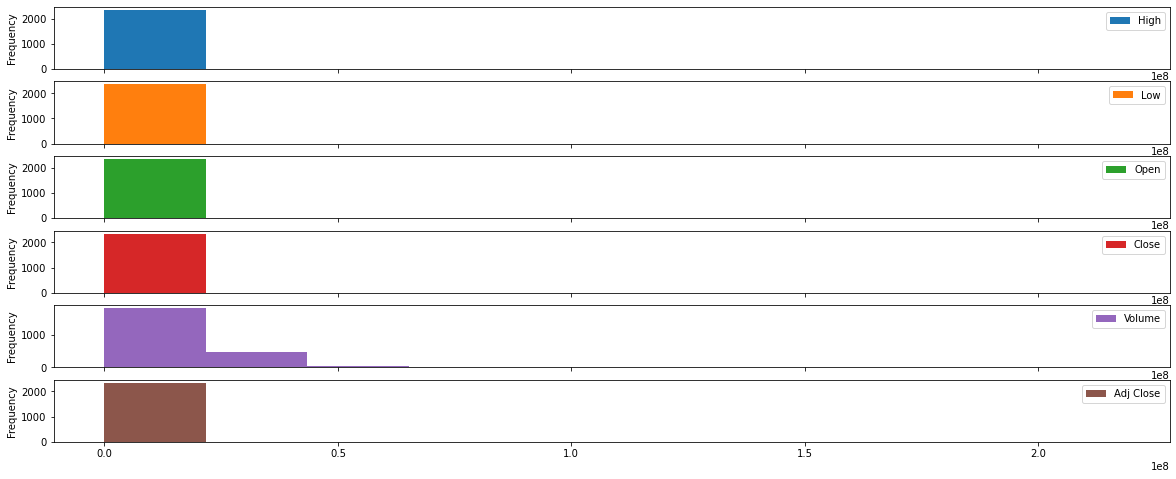

In [26]:
dataset.plot(kind='hist',subplots=True)

In [27]:
from sklearn.model_selection import train_test_split
ChartData=dataset.reset_index()
ChartData.insert(1,'Days',ChartData.index+1)

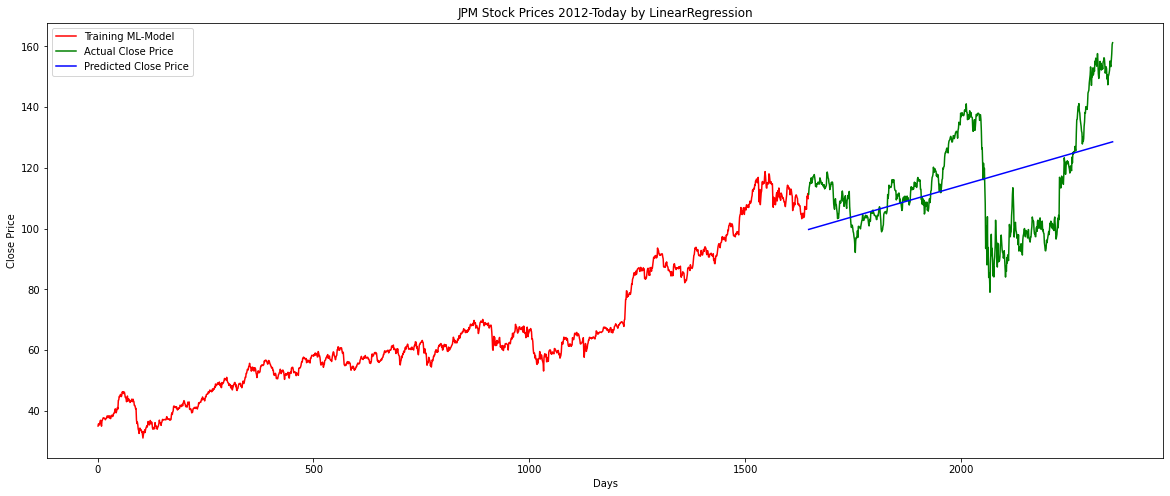

,Algorithm Name,Error Type,Score,Stock Name
0,LSTM,R-Square Error:,0.970420,JPM
1,LSTM,Mean Absolute Error:,2.026467,JPM
2,LSTM,Root Mean Squared Error:,2.973282,JPM
3,LSTM,Mean Squared Error:,8.840404,JPM
4,XGBRegressor,R-Square Error:,0.999257,JPM
5,XGBRegressor,Mean Absolute Error:,0.537217,JPM
6,XGBRegressor,Root Mean Squared Error:,0.822472,JPM
7,XGBRegressor,Mean Squared Error:,0.676460,JPM
8,RandomForestRegressor,R-Square Error:,0.999525,JPM
9,RandomForestRegressor,Mean Absolute Error:,0.434645,JPM


In [28]:

training_data_len = int(np.ceil( len(ChartData) * .70 ))
# print(nparry)
X_train = ChartData.iloc[0:training_data_len, 1:2].values
# X_train=X_train.values
y_train = ChartData.iloc[0:training_data_len, 5:6].values

X_test = ChartData.iloc[training_data_len:, 1:2].values
# X_train=X_train.values
y_test = ChartData.iloc[training_data_len:, 5:6].values
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression(fit_intercept=True, normalize=True, copy_X=True,n_jobs=-1)
regressor.fit(X_train,y_train)
predicted=regressor.predict(X_test)
resultsdf=  resultsdf.append(my_dict(symbol+':','LinearRegression:','R-Square Error:',metrics.r2_score(y_test , predicted)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol+':','LinearRegression:','Mean Absolute Error:', metrics.mean_absolute_error(y_test , predicted)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol+':','LinearRegression:','Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test , predicted))),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol+':','LinearRegression:','Mean Squared Error:', metrics.mean_squared_error(y_test , predicted)),ignore_index=True)
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(X_train, y_train, color = 'red', label="Training ML-Model")
plt.plot(X_test,y_test, color='green', label="Actual Close Price")
plt.plot(X_test,predicted, color='blue', label="Predicted Close Price")

plt.title(symbol+' Stock Prices 2012-Today by LinearRegression')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()
resultsdf

In [29]:
y_test

array([[111.27999878],
       [113.34999847],
       [114.15000153],
       [115.18000031],
       [114.84999847],
       [116.02999878],
       [116.73000336],
       [114.94999695],
       [115.66000366],
       [116.15000153],
       [117.08999634],
       [117.12000275],
       [117.55000305],
       [117.79000092],
       [116.87999725],
       [115.73000336],
       [113.88999939],
       [114.65000153],
       [113.69999695],
       [114.76999664],
       [114.76999664],
       [114.62000275],
       [115.31999969],
       [114.97000122],
       [114.73000336],
       [114.68000031],
       [116.70999908],
       [116.13999939],
       [115.76000214],
       [115.19000244],
       [114.58000183],
       [115.15000153],
       [114.58999634],
       [114.09999847],
       [114.31999969],
       [113.70999908],
       [114.43000031],
       [113.08000183],
       [113.51999664],
       [113.5       ],
       [113.83999634],
       [114.30000305],
       [117.62000275],
       [118

<ipython-input-30-0baba61f84c3>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand=randomRegressor.fit(X_train,y_train)


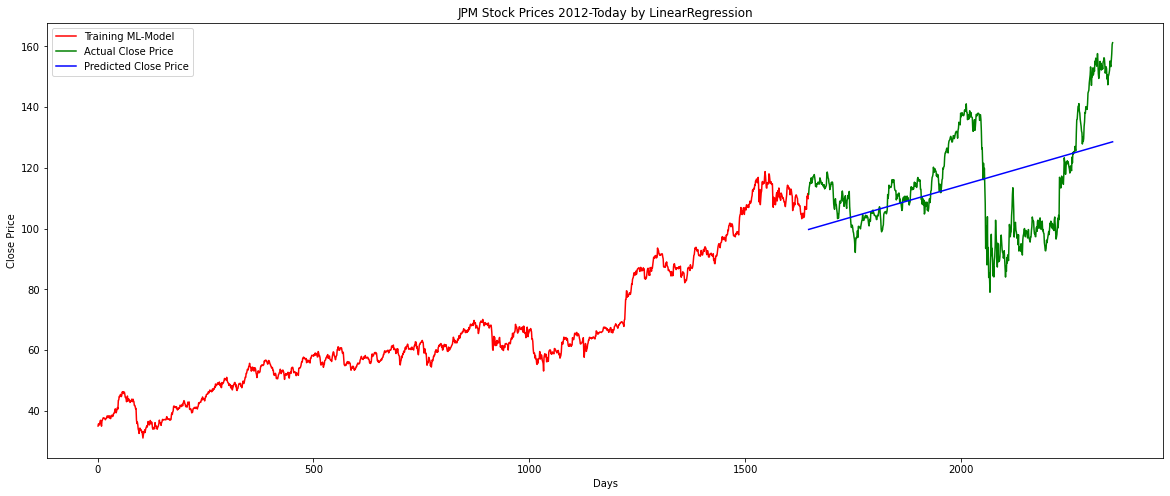

,Algorithm Name,Error Type,Score,Stock Name
0,LSTM,R-Square Error:,0.970420,JPM
1,LSTM,Mean Absolute Error:,2.026467,JPM
2,LSTM,Root Mean Squared Error:,2.973282,JPM
3,LSTM,Mean Squared Error:,8.840404,JPM
4,XGBRegressor,R-Square Error:,0.999257,JPM
5,XGBRegressor,Mean Absolute Error:,0.537217,JPM
6,XGBRegressor,Root Mean Squared Error:,0.822472,JPM
7,XGBRegressor,Mean Squared Error:,0.676460,JPM
8,RandomForestRegressor,R-Square Error:,0.999525,JPM
9,RandomForestRegressor,Mean Absolute Error:,0.434645,JPM


In [30]:
from sklearn.ensemble import RandomForestRegressor
randomRegressor=RandomForestRegressor( n_estimators=1000,
criterion='mae',
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
min_weight_fraction_leaf=0.3,
max_features='auto',
max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_impurity_split=None,
bootstrap=True,
oob_score=False,
n_jobs=None,
random_state=None,
verbose=0,
warm_start=False,
ccp_alpha=0.0,
max_samples=None,)
rand=randomRegressor.fit(X_train,y_train)
y_pred = randomRegressor.predict(X_test)
resultsdf=  resultsdf.append(my_dict(symbol+':','RandomForestRegressor:','R-Square Error:',metrics.r2_score(y_test , predicted)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol+':','RandomForestRegressor:','Mean Absolute Error:', metrics.mean_absolute_error(y_test , predicted)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol+':','RandomForestRegressor:','Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test , predicted))),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol+':','RandomForestRegressor:','Mean Squared Error:', metrics.mean_squared_error(y_test , predicted)),ignore_index=True)
plt.rcParams["figure.figsize"] = (20,8)
rand
plt.plot(X_train, y_train, color = 'red', label="Training ML-Model")
plt.plot(X_test,y_test, color='green', label="Actual Close Price")
plt.plot(X_test,predicted, color='blue', label="Predicted Close Price")

plt.title(symbol+' Stock Prices 2012-Today by LinearRegression')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()
resultsdf

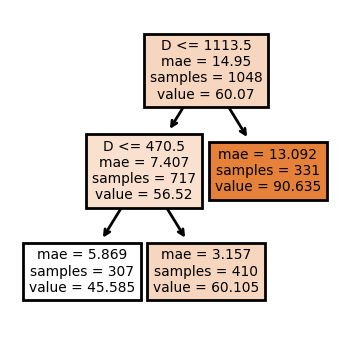

In [31]:
from sklearn import tree
fn='Days'
cn='Close'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=200)
tree.plot_tree(rand.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [32]:
ChartData

,Date,Days,High,Low,Open,Close,Volume,Adj Close
0,2012-01-04,1,35.150002,34.330002,34.439999,34.950001,36571200.0,27.033739
1,2012-01-05,2,35.919998,34.400002,34.709999,35.680000,38381400.0,27.598391
2,2012-01-06,3,35.770000,35.139999,35.689999,35.360001,33160600.0,27.350857
3,2012-01-09,4,35.680000,34.990002,35.439999,35.299999,23001800.0,27.304457
4,2012-01-10,5,36.349998,35.759998,36.070000,36.049999,35972800.0,27.884573
...,...,...,...,...,...,...,...,...
2346,2021-05-03,2347,155.479996,153.130005,154.850006,153.360001,11801100.0,153.360001
2347,2021-05-04,2348,155.639999,152.139999,152.869995,155.479996,12977700.0,155.479996
2348,2021-05-05,2349,158.279999,156.000000,156.000000,157.520004,6938200.0,157.520004
2349,2021-05-06,2350,160.820007,157.160004,158.070007,160.690002,13534100.0,160.690002


<ipython-input-33-071b0fa060d7>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand=randomRegressor.fit(X_train,y_train)


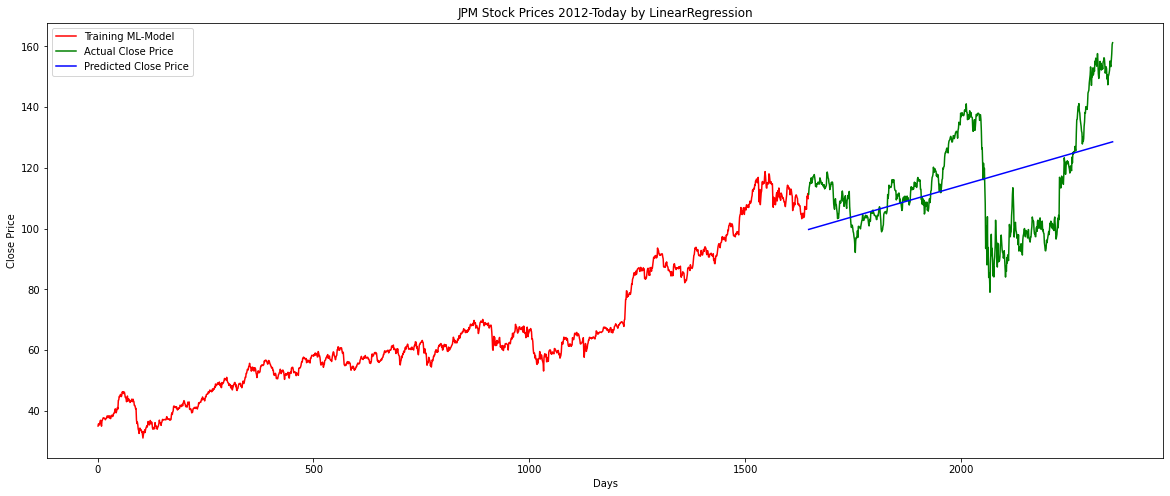

,Algorithm Name,Error Type,Score,Stock Name
0,LSTM,R-Square Error:,0.970420,JPM
1,LSTM,Mean Absolute Error:,2.026467,JPM
2,LSTM,Root Mean Squared Error:,2.973282,JPM
3,LSTM,Mean Squared Error:,8.840404,JPM
4,XGBRegressor,R-Square Error:,0.999257,JPM
5,XGBRegressor,Mean Absolute Error:,0.537217,JPM
6,XGBRegressor,Root Mean Squared Error:,0.822472,JPM
7,XGBRegressor,Mean Squared Error:,0.676460,JPM
8,RandomForestRegressor,R-Square Error:,0.999525,JPM
9,RandomForestRegressor,Mean Absolute Error:,0.434645,JPM


In [33]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(
    criterion='mse',
    splitter='best',
    max_depth=10,
    min_samples_split=8,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort='deprecated',
    ccp_alpha=0.0,)
rand=randomRegressor.fit(X_train,y_train)
y_pred = randomRegressor.predict(X_test)
resultsdf=  resultsdf.append(my_dict(symbol+':','DecisionTreeRegressor:','R-Square Error:',metrics.r2_score(y_test , predicted)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol+':','DecisionTreeRegressor:','Mean Absolute Error:', metrics.mean_absolute_error(y_test , predicted)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol+':','DecisionTreeRegressor:','Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test , predicted))),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol+':','DecisionTreeRegressor:','Mean Squared Error:', metrics.mean_squared_error(y_test , predicted)),ignore_index=True)
plt.rcParams["figure.figsize"] = (20,8)
rand
plt.plot(X_train, y_train, color = 'red', label="Training ML-Model")
plt.plot(X_test,y_test, color='green', label="Actual Close Price")
plt.plot(X_test,predicted, color='blue', label="Predicted Close Price")

plt.title(symbol+' Stock Prices 2012-Today by LinearRegression')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()
resultsdf

<ipython-input-34-01233b714fe8>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


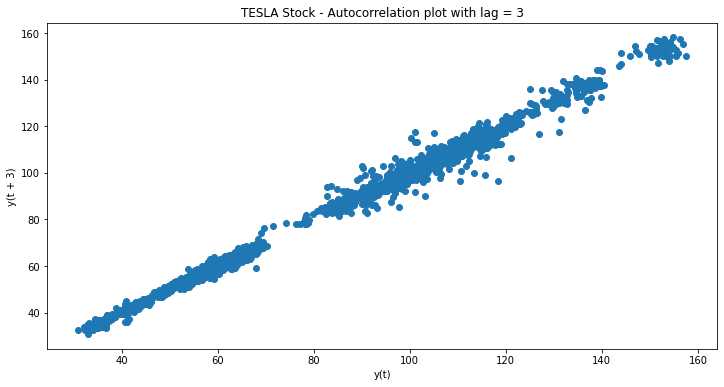

In [34]:
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(12,6))
lag_plot(ChartData['Open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

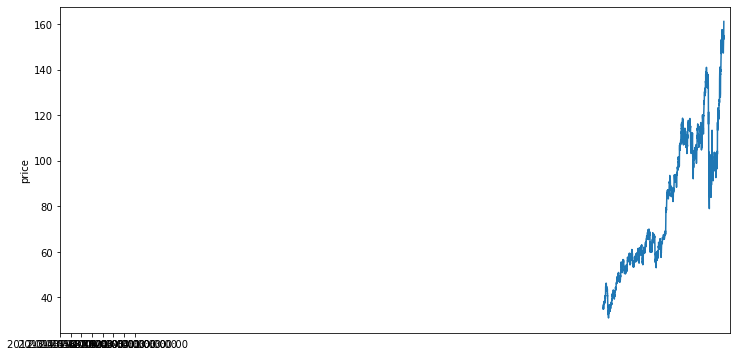

In [35]:
plt.figure(figsize=(12,6))
plt.plot(ChartData["Date"], ChartData["Close"])
plt.xticks(np.arange(0,2300, 300), ChartData['Date'][0:2300:300])
# plt.title("TESLA stock price over time")
# plt.xlabel("Date")
plt.ylabel("price")
plt.show()

In [36]:
# train_data, test_data = ChartData[0:int(len(ChartData)*0.7)], ChartData[int(len(ChartData)*0.7):]
# training_data = train_data['Close'].values
# test_data = test_data['Close'].values
# history = [x for x in training_data]
# model_predictions = []
# N_test_observations = len(test_data)
# for time_point in range(N_test_observations):
#     model = ARIMA(history, order=(4,1,0))
#     model_fit = model.fit(disp=0)
#     output = model_fit.forecast()
#     yhat = output[0]
#     model_predictions.append(yhat)
#     true_test_value = test_data[time_point]
#     history.append(true_test_value)
# MSE_error = mean_squared_error(test_data, model_predictions)
# print('Testing Mean Squared Error is {}'.format(MSE_error))

In [37]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\ProgramData\Anaconda3\python.exe
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


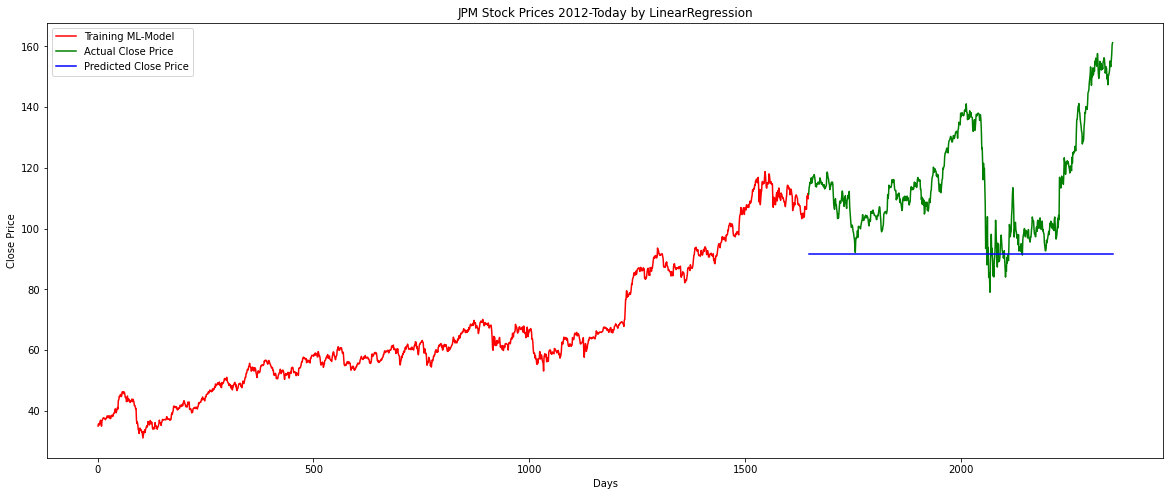

,Algorithm Name,Error Type,Score,Stock Name
0,LSTM,R-Square Error:,0.970420,JPM
1,LSTM,Mean Absolute Error:,2.026467,JPM
2,LSTM,Root Mean Squared Error:,2.973282,JPM
3,LSTM,Mean Squared Error:,8.840404,JPM
4,XGBRegressor,R-Square Error:,0.999257,JPM
5,XGBRegressor,Mean Absolute Error:,0.537217,JPM
6,XGBRegressor,Root Mean Squared Error:,0.822472,JPM
7,XGBRegressor,Mean Squared Error:,0.676460,JPM
8,RandomForestRegressor,R-Square Error:,0.999525,JPM
9,RandomForestRegressor,Mean Absolute Error:,0.434645,JPM


In [38]:

resultsdf=  resultsdf.append(my_dict(symbol+':','svmRegressor:','R-Square Error:',metrics.r2_score(y_test , y_pred)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol+':','svmRegressor:','Mean Absolute Error:', metrics.mean_absolute_error(y_test , y_pred)),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol+':','svmRegressor:','Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test , y_pred))),ignore_index=True)
resultsdf = resultsdf.append(my_dict(symbol+':','svmRegressor:','Mean Squared Error:', metrics.mean_squared_error(y_test , y_pred)),ignore_index=True)
plt.rcParams["figure.figsize"] = (20,8)
rand
plt.plot(X_train, y_train, color = 'red', label="Training ML-Model")
plt.plot(X_test,y_test, color='green', label="Actual Close Price")
plt.plot(X_test,y_pred, color='blue', label="Predicted Close Price")

plt.title(symbol+' Stock Prices 2012-Today by LinearRegression')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()
resultsdf

In [39]:
# training_data_len = int(np.ceil( len(ChartData) * .70 ))
# # print(nparry)
# X_train = ChartData.iloc[0:training_data_len, 1:2].values
# # X_train=X_train.values
# y_train = ChartData.iloc[0:training_data_len, 5:6].values

# X_test = ChartData.iloc[training_data_len:, 1:2].values
# # X_train=X_train.values
# y_test = ChartData.iloc[training_data_len:, 5:6].values
# from sklearn import svm
# from keras.models import Sequential, load_model
# svmRegressor=svm.SVR(
#     kernel='linear',
#     degree=3,
#     gamma='scale',
#     coef0=0.0,
#     tol=0.001,
#     C=1.0,
#     epsilon=0.1,
#     shrinking=True,
#     cache_size=200,
#     verbose=False,
#     max_iter=-1,)
# import os


# # Train the model

# rand=svmRegressor.fit(X_train,y_train)
# y_pred = svmRegressor.predict(X_test)

# plt.rcParams["figure.figsize"] = (20,8)
# plt.plot(X_train, y_train, color = 'red', label="Training ML-Model")
# plt.plot(X_test,y_test, color='green', label="Actual Close Price")
# plt.plot(X_test,y_pred, color='blue', label="Predicted Close Price")
# plt.title(symbol+' Stock Prices 2012-Today by svmRegressor')
# plt.xlabel('Days')
# plt.ylabel('Close Price')
# plt.legend()
# plt.show()
# resultsdf=  resultsdf.append(my_dict(symbol+':','SVRlinear:','R-Square Error:',metrics.r2_score(y_test , y_pred)),ignore_index=True)
# resultsdf = resultsdf.append(my_dict(symbol+':','SVRlinear:','Mean Absolute Error:', metrics.mean_absolute_error(y_test , y_pred)),ignore_index=True)
# resultsdf = resultsdf.append(my_dict(symbol+':','SVRlinear:','Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test , y_pred))),ignore_index=True)
# resultsdf = resultsdf.append(my_dict(symbol+':','SVRlinear:','Mean Squared Error:', metrics.mean_squared_error(y_test , y_pred)),ignore_index=True)

In [40]:
# training_data_len = int(np.ceil( len(ChartData) * .70 ))
# # print(nparry)
# X_train = ChartData.iloc[0:training_data_len, 1:2].values
# # X_train=X_train.values
# y_train = ChartData.iloc[0:training_data_len, 5:6].values

# X_test = ChartData.iloc[training_data_len:, 1:2].values
# # X_train=X_train.values
# y_test = ChartData.iloc[training_data_len:, 5:6].values
# from sklearn import svm
# svmRegressor=svm.SVR(
#     kernel='poly',
#     degree=3,
#     gamma='scale',
#     coef0=0.0,
#     tol=0.001,
#     C=10.0,
#     epsilon=0.1,
#     shrinking=True,
#     cache_size=200,
#     verbose=False,
#     max_iter=-1,)
# import os
# from keras.models import Sequential, load_model

# # Train the model

# rand=svmRegressor.fit(X_train,y_train)

# y_pred = svmRegressor.predict(X_test)

# plt.rcParams["figure.figsize"] = (20,8)
# plt.plot(X_train, y_train, color = 'red', label="Training ML-Model")
# plt.plot(X_test,y_test, color='green', label="Actual Close Price")
# plt.plot(X_test,y_pred, color='blue', label="Predicted Close Price")
# plt.title(symbol+' Stock Prices 2012-Today by svmRegressor with polynomial kernal')
# plt.xlabel('Days')
# plt.ylabel('Close Price')
# plt.legend()
# plt.show()
# resultsdf=  resultsdf.append(my_dict(symbol+':','SVRpoly:','R-Square Error:',metrics.r2_score(y_test , y_pred)),ignore_index=True)
# resultsdf = resultsdf.append(my_dict(symbol+':','SVRpoly:','Mean Absolute Error:', metrics.mean_absolute_error(y_test , y_pred)),ignore_index=True)
# resultsdf = resultsdf.append(my_dict(symbol+':','SVRpoly:','Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test , y_pred))),ignore_index=True)
# resultsdf = resultsdf.append(my_dict(symbol+':','SVRpoly:','Mean Squared Error:', metrics.mean_squared_error(y_test , y_pred)),ignore_index=True)
# resultsdf

In [41]:
# training_data_len = int(np.ceil( len(ChartData) * .70 ))
# # print(nparry)
# X_train = ChartData.iloc[0:training_data_len, 1:2].values
# # X_train=X_train.values
# y_train = ChartData.iloc[0:training_data_len, 5:6].values

# X_test = ChartData.iloc[training_data_len:, 1:2].values
# # X_train=X_train.values
# y_test = ChartData.iloc[training_data_len:, 5:6].values
# from sklearn import svm
# svmRegressor=svm.SVR(
#     kernel='rbf',
#     degree=3,
#     gamma='scale',
#     coef0=0.0,
#     tol=0.001,
#     C=1000.0,
#     epsilon=0.1,
#     shrinking=True,
#     cache_size=200,
#     verbose=False,
#     max_iter=-1,)
# import os
# from keras.models import Sequential, load_model

# # Train the model

# svmRegressor.fit(X_train,y_train)

# y_pred = svmRegressor.predict(X_test)

# plt.rcParams["figure.figsize"] = (20,8)
# plt.plot(X_train, y_train, color = 'red', label="Training ML-Model")
# plt.plot(X_test,y_test, color='green', label="Actual Close Price")
# plt.plot(X_test,y_pred, color='blue', label="Predicted Close Price")
# plt.title(symbol+' Stock Prices 2012-Today by svmRegressor with RBF kernal')
# plt.xlabel('Days')
# plt.ylabel('Close Price')
# plt.legend()
# plt.show()
# resultsdf=  resultsdf.append(my_dict(symbol+':','SVRRBF:','R-Square Error:',metrics.r2_score(X_test , y_pred)),ignore_index=True)
# resultsdf = resultsdf.append(my_dict(symbol+':','SVRRBF:','Mean Absolute Error:', metrics.mean_absolute_error(X_test , y_pred)),ignore_index=True)
# resultsdf = resultsdf.append(my_dict(symbol+':','SVRRBF:','Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X_test , y_pred))),ignore_index=True)
# resultsdf = resultsdf.append(my_dict(symbol+':','SVRRBF:','Mean Squared Error:', metrics.mean_squared_error(X_test , y_pred)),ignore_index=True)
# resultsdf

In [115]:
resultsdf=resultsdf[['Algorithm Name','Error Type','Score']]

<AxesSubplot:>

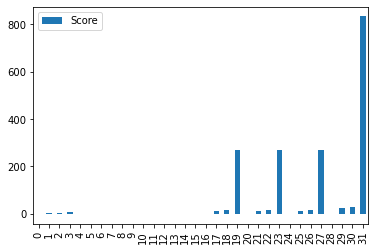

In [119]:
resultsdf.plot.bar()

Text(0, 0.5, 'Units')

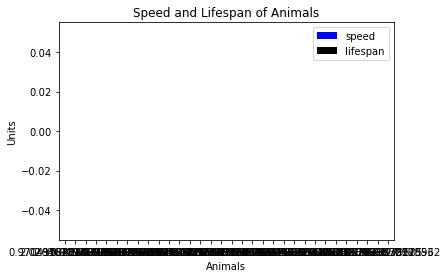

In [90]:
#Stacked bar chart

import pandas as pd

speed = resultsdf['Error Type'] 
lifespan =resultsdf['Algorithm Name']
index = resultsdf['Score']
df = pd.DataFrame({'speed': speed,
'lifespan': lifespan}, index=index)
ax = df.plot.bar(stacked=True, color = ("b", "k"), width= 0.6, rot = 0)

# set title
ax.set_title('Speed and Lifespan of Animals')

#set the x-axis label
ax.set_xlabel("Animals")

#set the y-axis label
ax.set_ylabel("Units")


In [109]:
plotdata = pd.DataFrame({
    "pies": [10, 10, 42, 17, 37], 
    "gender": ["male", "female", "male", "female", "male"]
    }, 
    index=["Dad", "Mam", "Bro", "Sis", "Me"]
)
plotdata.head()

,pies,gender
Dad,10,male
Mam,10,female
Bro,42,male
Sis,17,female
Me,37,male


In [120]:
# Adding the stacked=True option to plot() 
# creates a stacked bar plot
resultsdf.plot(kind='bar', stacked=True)
plt.title("Total Pie Consumption")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")

# Define a dictionary mapping variable values to colours:
colours = {"R-Square Error:": "#273c75", "Mean Absolute Error:": "#44bd32","Root Mean Squared Error:": "#44bd32","Mean Squared Error:": "#44bd32"}
resultsdf['Score'].plot(
    kind="bar", 
    color=resultsdf['Algorithm Name']

SyntaxError: unexpected EOF while parsing (<ipython-input-120-3c2e203b1c71>, line 12)

In [113]:
# Plot and control the legend position, layout, and title with .legend(...)
plotdata[["pies_2020", "pies_2018", "pies_2019"]].plot(
    kind="bar", stacked=True
).legend(
    loc='upper center', ncol=3, title="Year of Eating"
)
plt.title("Mince Pie Consumption Totals")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")

KeyError: "None of [Index(['pies_2020', 'pies_2018', 'pies_2019'], dtype='object')] are in the [columns]"